In [2]:
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
X = pd.read_csv(r'..\dataset\podaci_za_klasterovanje\X')
X

,Principal_component_0,Principal_component_1
0,12.661187,3.361756
1,-1.788860,0.837765
2,0.218039,-1.026207
3,-0.654248,-0.465897
4,3.602288,2.828493
...,...,...
1335,0.305838,1.811039
1336,0.241364,-0.924689
1337,-2.128252,0.752848
1338,1.046243,-1.846078


In [4]:
from sklearn.cluster import AgglomerativeClustering

In [5]:
model = AgglomerativeClustering(n_clusters=3, linkage='ward', compute_distances=True)

In [6]:
model.fit(X)

AgglomerativeClustering(compute_distances=True, n_clusters=3)

In [7]:
import numpy as np
np.unique(model.labels_)

array([0, 1, 2], dtype=int64)

In [8]:
X[model.labels_ == 2]

,Principal_component_0,Principal_component_1
6,-4.169724,0.439712
18,-3.827236,0.065329
19,-3.698510,0.246415
20,-3.609351,0.376089
25,-3.173945,0.081423
...,...,...
1302,-3.022274,0.203222
1309,-3.444635,0.491989
1311,-3.322622,1.032560
1319,-3.825912,-0.076185


In [9]:
model.children_[:,0].shape

(1339,)

In [10]:
model.distances_

array([2.95878997e-03, 5.94271016e-03, 6.05094747e-03, ...,
       4.93427145e+01, 6.49975783e+01, 1.19030376e+02])

In [11]:
model.children_

array([[ 407,  968],
       [ 741, 1259],
       [   1,  278],
       ...,
       [2669, 2674],
       [2668, 2676],
       [2675, 2677]], dtype=int64)

In [12]:
model.children_.shape

(1339, 2)

In [13]:
model.distances_.reshape(-1,1).shape

(1339, 1)

In [14]:
z = np.vstack((model.children_[:,0], model.children_[:,1], model.distances_))
z = np.transpose(z)
z

array([[4.07000000e+02, 9.68000000e+02, 2.95878997e-03],
       [7.41000000e+02, 1.25900000e+03, 5.94271016e-03],
       [1.00000000e+00, 2.78000000e+02, 6.05094747e-03],
       ...,
       [2.66900000e+03, 2.67400000e+03, 4.93427145e+01],
       [2.66800000e+03, 2.67600000e+03, 6.49975783e+01],
       [2.67500000e+03, 2.67700000e+03, 1.19030376e+02]])

In [15]:
from matplotlib import pyplot as plt
from sklearn.metrics import silhouette_score

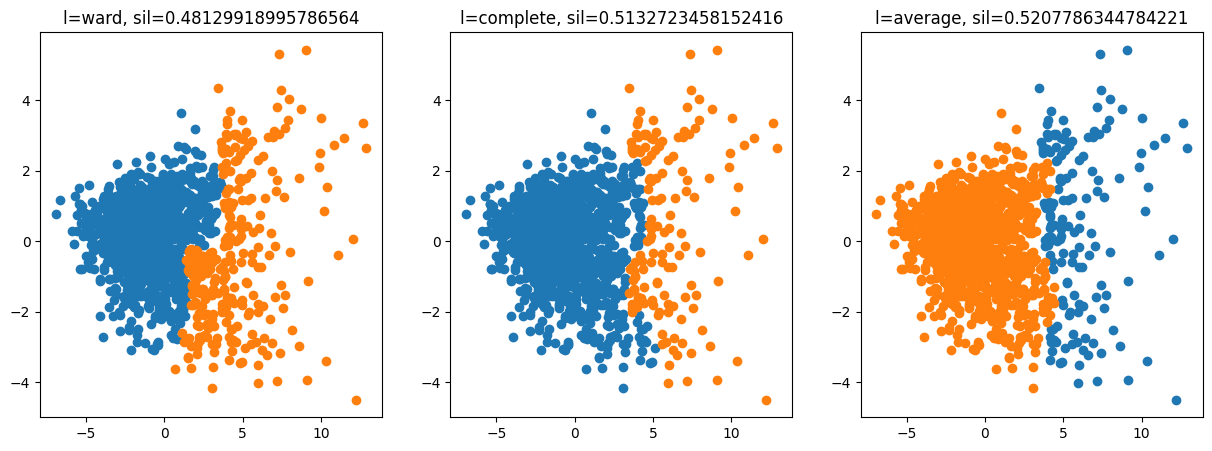

In [21]:
k = 2
linkages = ['ward', 'complete', 'average']
fig = plt.figure(figsize=(15,5))
for idx, linkage in enumerate(linkages):
    model = AgglomerativeClustering(n_clusters=k, linkage=linkage)
    model.fit(X)
    
    fig.add_subplot(1, len(linkages), idx+1)
    
    for cluster_label in range(k):
        cluster = X[model.labels_ == cluster_label]
        plt.scatter(cluster['Principal_component_0'], cluster['Principal_component_1'])
    plt.title(f'l={linkage}, sil={silhouette_score(X, model.labels_)}')

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [23]:
Z = linkage(X, method='average')
Z

array([[4.07000000e+02, 9.68000000e+02, 2.95878997e-03, 2.00000000e+00],
       [7.41000000e+02, 1.25900000e+03, 5.94271016e-03, 2.00000000e+00],
       [1.00000000e+00, 2.78000000e+02, 6.05094747e-03, 2.00000000e+00],
       ...,
       [2.48400000e+03, 2.67300000e+03, 6.24091985e+00, 1.18800000e+03],
       [2.67400000e+03, 2.67500000e+03, 6.51027046e+00, 1.52000000e+02],
       [2.67600000e+03, 2.67700000e+03, 7.30165454e+00, 1.34000000e+03]])

In [24]:
# dendrogram(Z, labels=df.index)

In [25]:
X.index

RangeIndex(start=0, stop=1340, step=1)

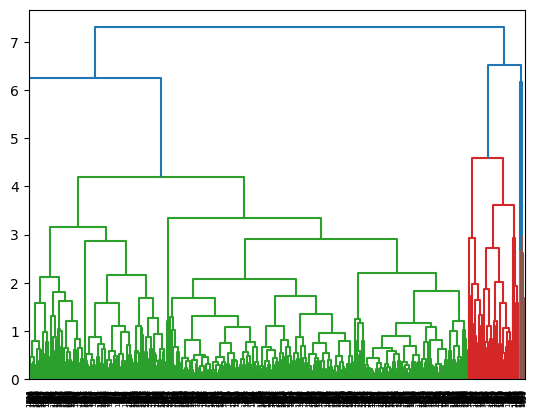

In [34]:
_ = dendrogram(Z, labels=X.index, leaf_rotation=90)

In [27]:
from sklearn.cluster import DBSCAN

In [28]:
model = DBSCAN(eps=0.1, min_samples=2)

In [29]:
model.fit(X)

DBSCAN(eps=0.1, min_samples=2)

In [30]:
model.labels_

array([ -1,   0,  -1, ...,  63, 199, 118], dtype=int64)

In [31]:
np.unique(model.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
       103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115,
       116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128,
       129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141,
       142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154,
       155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167,
       168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 17

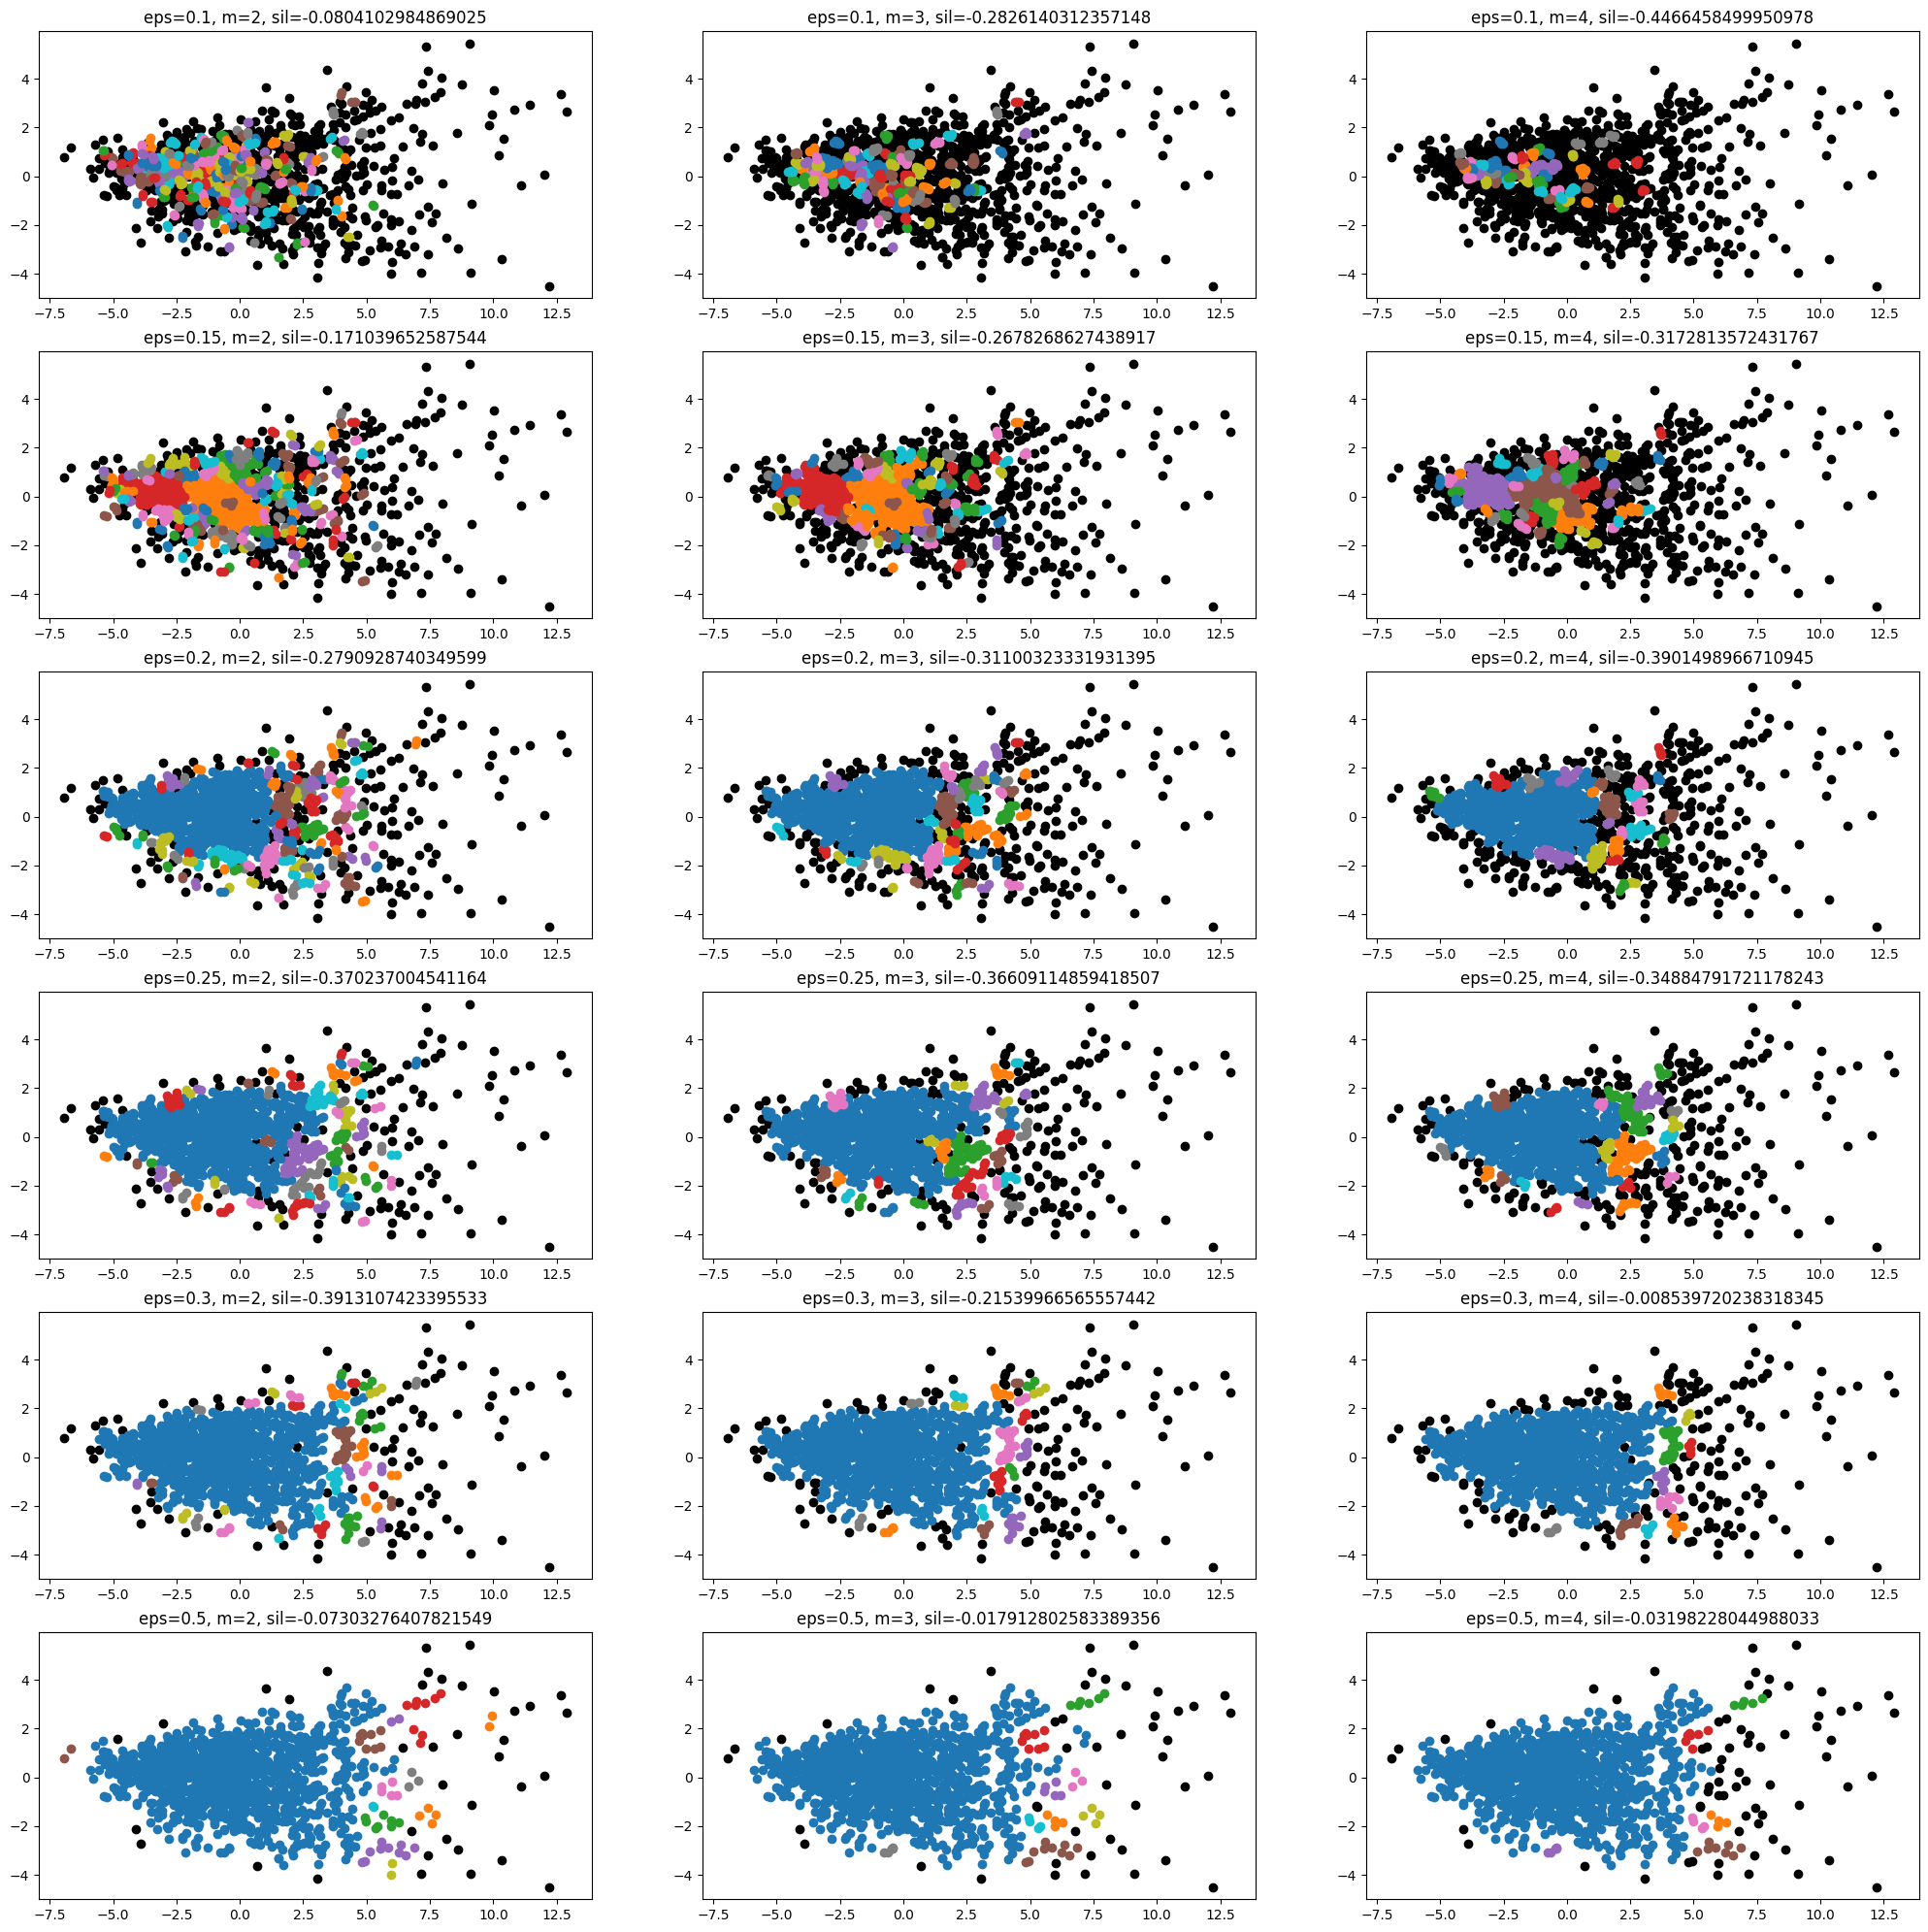

In [32]:
min_samples = 2
eps_values = [0.1, 0.15, 0.2, 0.25, 0.3, 0.5]
min_samples_values = range(2,5)
fig = plt.figure(figsize=(25,25))
idx = 1
for eps in eps_values:
    for min_samples in min_samples_values:
        model = DBSCAN(eps=eps, min_samples=min_samples)
        model.fit(X)

        fig.add_subplot(len(eps_values), len(min_samples_values), idx)
        idx += 1

        for cluster_label in np.unique(model.labels_):
            cluster = X[model.labels_ == cluster_label]
            if cluster_label == -1:
                plt.scatter(cluster['Principal_component_0'], cluster['Principal_component_1'], color='black', label='sum')
            else:
                plt.scatter(cluster['Principal_component_0'], cluster['Principal_component_1'], label=f'klaster {cluster_label}')

#         plt.legend()
        if len(np.unique(model.labels_)) == 1:
            s = None
        else:
            s = silhouette_score(X, model.labels_)
        plt.title(f'eps={eps}, m={min_samples}, sil={s}')
# plt.tight_layout()